Let's design a simple diverging lens using two concave surfaces, aka a biconcave lens.

The only difference with a converging lens is actually that the focal length is negative. Is is behind the lens in the sense that rays don't actually converge on the focal point, but they spread out and appear to come from the focal point. If you extend the outgoing rays in the negative direction, they will cross at the focal point.

rays aperture 0.0
rays aperture 0.27042007
rays aperture 0.26962662


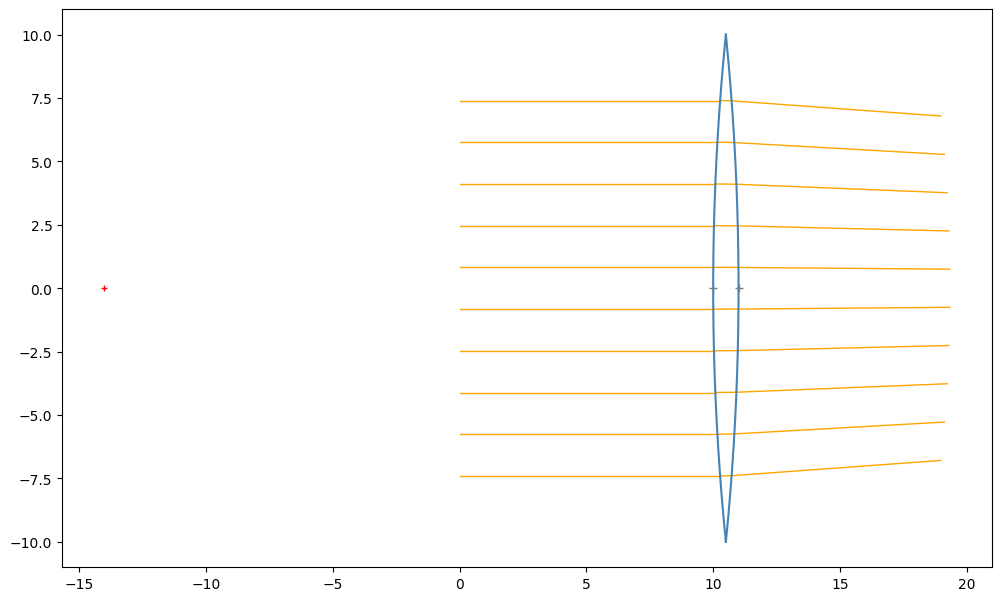

[  0/100] L= 34.262 | grad norm= 2623.638916015625
[  5/100] L= 22.351 | grad norm= 2158.80126953125
[ 10/100] L= 12.972 | grad norm= 1693.953369140625
[ 15/100] L=  6.236 | grad norm= 1222.5474853515625


[ 20/100] L=  2.112 | grad norm= 745.7691650390625
[ 25/100] L=  0.294 | grad norm= 283.4737548828125
[ 30/100] L=  0.062 | grad norm= 111.80049133300781
[ 35/100] L=  0.399 | grad norm= 363.19146728515625


[ 40/100] L=  0.532 | grad norm= 426.5316467285156
[ 45/100] L=  0.354 | grad norm= 339.415771484375
[ 50/100] L=  0.129 | grad norm= 187.75340270996094
[ 55/100] L=  0.030 | grad norm= 44.479827880859375


[ 60/100] L=  0.033 | grad norm= 52.786495208740234
[ 65/100] L=  0.053 | grad norm= 95.36109161376953
[ 70/100] L=  0.052 | grad norm= 92.1771469116211
[ 75/100] L=  0.036 | grad norm= 60.945213317871094


[ 80/100] L=  0.026 | grad norm= 21.391571044921875
[ 85/100] L=  0.025 | grad norm= 10.430418968200684
[ 90/100] L=  0.026 | grad norm= 26.162981033325195
[ 95/100] L=  0.026 | grad norm= 25.987661361694336


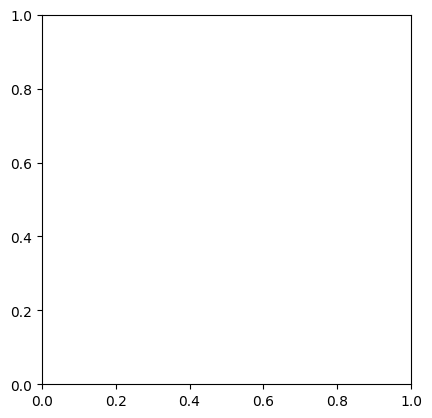

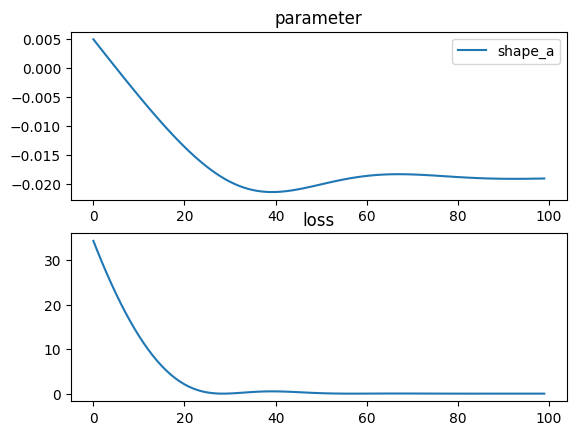

rays aperture 0.0
rays aperture 1.0319815
rays aperture 1.115798


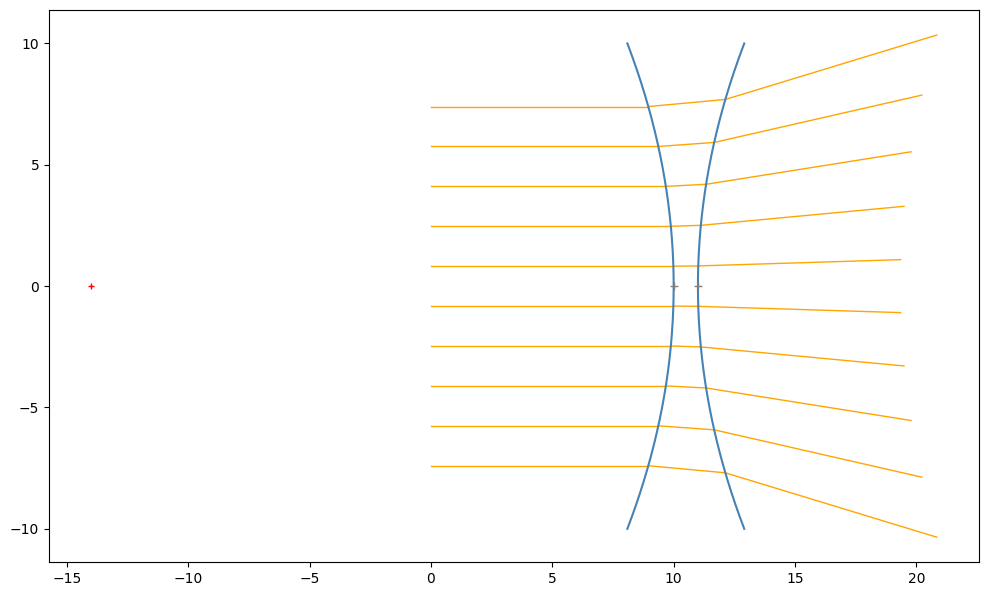

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


class Optics(tlm.Module):
    def __init__(self):
        super().__init__()

        # A simple parabolic shape for both surfaces
        # Wrap it in a nn.Parameter to enable optimization
        self.shape = tlm.Parabola(height=20., a=nn.Parameter(torch.tensor(0.005)))

        # Symmetric lens sharing the same mirrored shape for both surfaces
        # We set the inner thickness because we know that the lens will be biconcave
        # and therefore the outer thickness will be greater
        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.49), inner_thickness=1.0)

        # Setup the optical stack with a simple parallel light source and negative focal point
        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=15),
            tlm.Gap(10.), 
            self.lens,
            tlm.Gap(-25.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

# Instanciate the optical stack
optics = Optics()

# Render it using the matplotlib renderer
tlm.render_plt(optics)

# Optimize the parameters, here only the shape's parabolic coefficient
tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 100
)

# Render again after optimization
tlm.render_plt(optics)

In [2]:
from IPython.display import display
import build123d as bd

part = tlm.lens_to_part(optics.lens)
display(part)

print("Outer thickness:", optics.lens.outer_thickness().item())
print("Inner thickness:", optics.lens.inner_thickness().item())

# bd.export_step(part, "lens.step")

Part at 0x7d379be6c110, label(), #children(0)

Outer thickness: 4.816218376159668
Inner thickness: 1.0
